<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

## Importation des packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV

# Classifiers
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Regression
from sklearn.svm import LinearSVR, SVR

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn_evaluation import plot

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [4]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis (EDA)

#### 1) Importer le dataset Iris depuis sklearn

In [8]:
# Importation de la BDD
sk_iris = datasets.load_iris()
iris = pd.DataFrame(data=np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names'] + ['species'])

- Vérification des valeurs manquantes

In [11]:
print("Valeurs manquantes par colonne:")
print(iris.isnull().sum())

Valeurs manquantes par colonne:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


- Visualisation des premières observations et du type des données

In [6]:
print(iris.info())
iris.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
# 5 lignes au harsard
iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
44,5.1,3.8,1.9,0.4,0.0
7,5.0,3.4,1.5,0.2,0.0
143,6.8,3.2,5.9,2.3,2.0
113,5.7,2.5,5.0,2.0,2.0
80,5.5,2.4,3.8,1.1,1.0


**2) Statistiques descriptives pour mieux comprendre le dataset**

In [10]:
display(iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- Distribution des classes

In [17]:
iris['species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: species, dtype: int64

In [18]:
#Tester pygwalker si vous avez le temps
import pygwalker as pyg

In [19]:
 # Vous pouvez tester Pygwalker ici ?
walker=pyg.walk(iris)
walker.display_on_jupyter()

Box(children=(HTML(value='\n<div id="ifr-pyg-00062f9df6ad691bjxUBQ8k9SDlOKmaT" style="height: auto">\n    <hea…

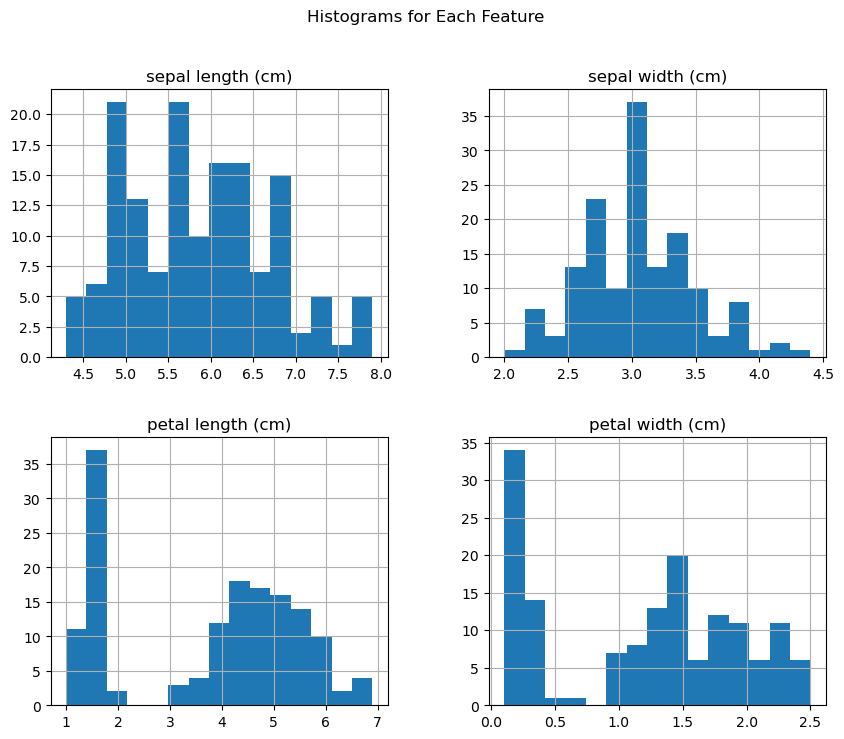

In [20]:
#Histogramme
iris.drop(columns='species').hist(bins=15, figsize=(10, 8))
plt.suptitle('Histograms for Each Feature')
plt.show()

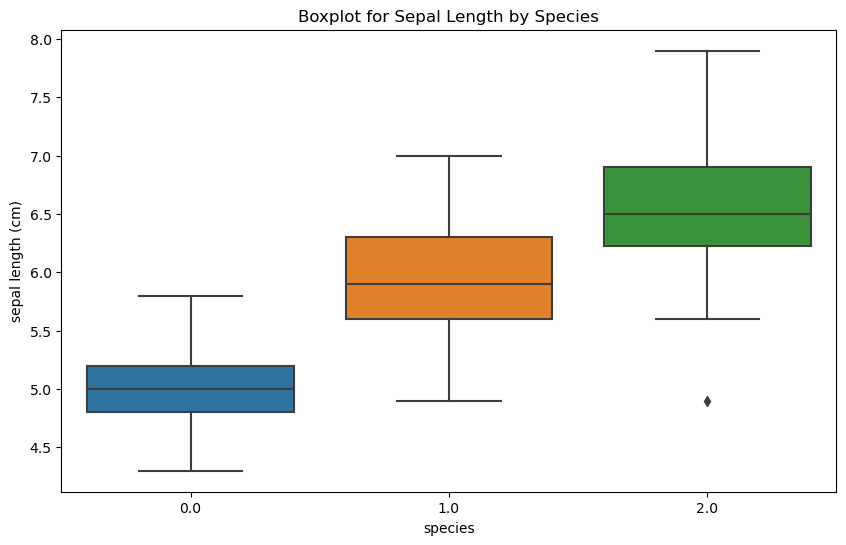

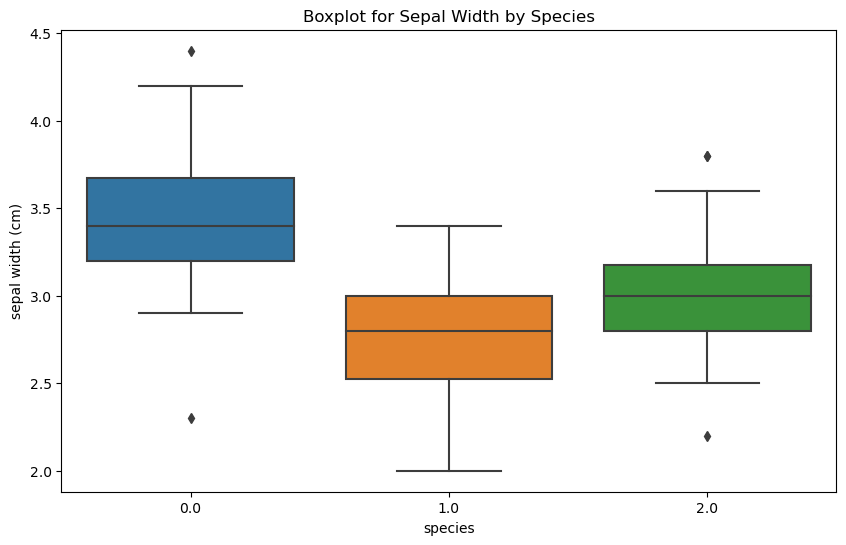

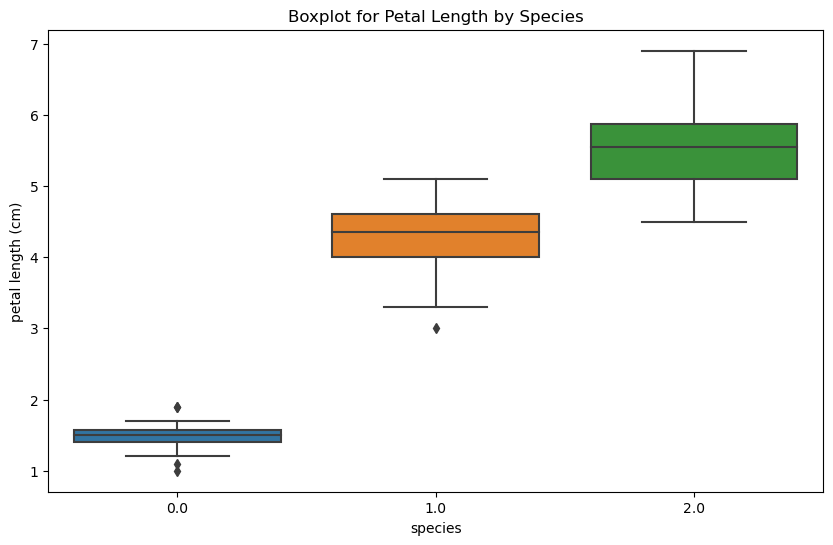

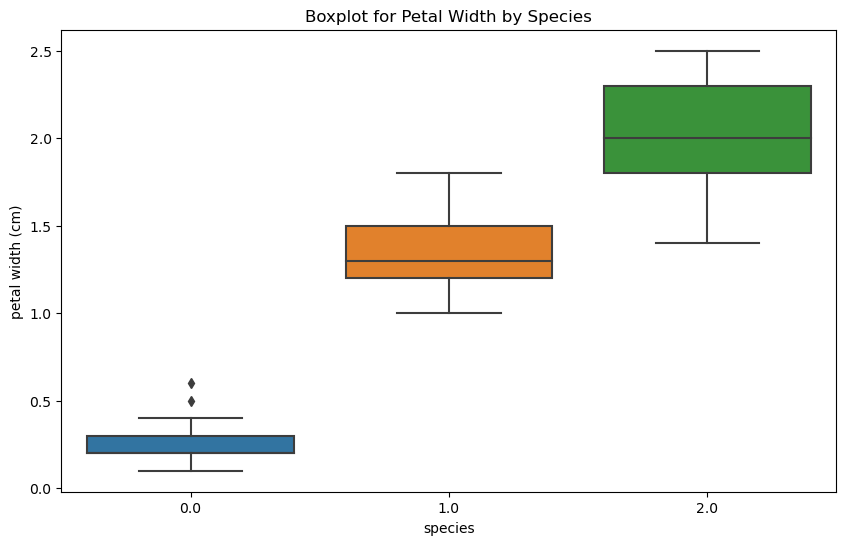

In [12]:
# Boxplot pour chaque variable en fonction de l'espèce
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='sepal length (cm)')
plt.title('Boxplot for Sepal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='sepal width (cm)')
plt.title('Boxplot for Sepal Width by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='petal length (cm)')
plt.title('Boxplot for Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='petal width (cm)')
plt.title('Boxplot for Petal Width by Species')
plt.show()


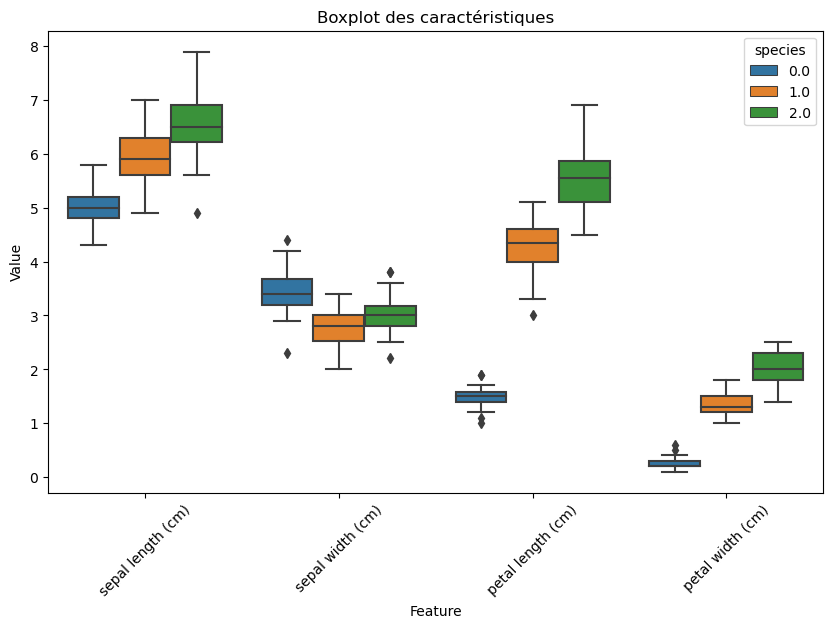

In [14]:
# Visualisation des boxplots
plt.figure(figsize=(10,6))
iris_melted = pd.melt(iris, id_vars=['species'], var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='species', data=iris_melted)
plt.xticks(rotation=45)
plt.title('Boxplot des caractéristiques')
plt.show()

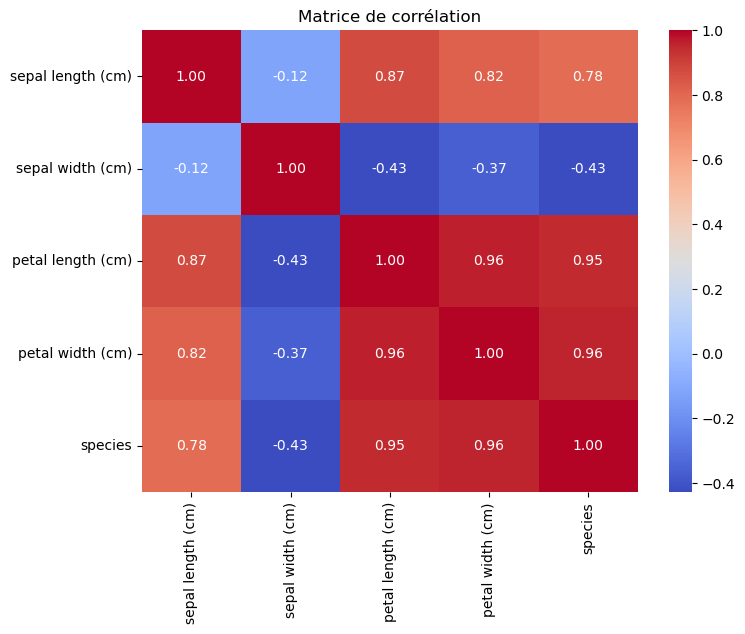

In [21]:
#Matrice de corrélation 
plt.figure(figsize=(8,6))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

In [22]:
iris.corr(method="spearman")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


#### 3) Recoder variables, si besoin

In [27]:
#Recodage de la variable species
iris['species'] = iris.species.astype('int32')

print(iris.info())
iris.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [30]:
#dataset contenant 2 espèces (ici on a conservé 0 et 1 donc retirer 2)
iris2 = iris[iris["species"].isin([0,1])]
iris2.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 4) Découper data set en train et test

In [33]:
X_train , X_test, y_train, y_test = train_test_split(iris2.iloc[:,:4],  
                                                    iris2['species'], 
                                                    test_size=0.2 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )

#standarisation possible

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
y_train.value_counts()
#target équilibréé (1 et 2)

1    42
0    38
Name: species, dtype: int64

In [41]:
y_test.value_counts() #idem

0    12
1     8
Name: species, dtype: int64

#### 5) Importer les modules pour la modélisation

cf. début du code

In [43]:
#... au début du code

#noyau Radial Basis Function
svm = SVC(kernel="rbf",  gamma=5, C=0.001)
svm.fit(X, y)

# Loss='hinge' permet de dire qu'on utile un SVM classique
svm_clf= LinearSVC(loss='hinge', C=1)
svm_clf.fit(X, y)



LinearSVC(C=1, loss='hinge')

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

In [44]:
# On garde uniquement deux features pour la modélisation binaire 
X_train_2_features = X_train[['sepal length (cm)', 'sepal width (cm)']]
X_test_2_features = X_test[['sepal length (cm)', 'sepal width (cm)']]

In [45]:
#On utilise StandarScaler uniquement sur le X_train pour calculer les moyennes!
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [47]:
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [49]:
#Train model SVC

list_two_col = iris2.columns[0:2]

class_svc = SVC(random_state=42, kernel='linear')
class_svc.fit(X_train_sc[:,0:2], y_train)

SVC(kernel='linear', random_state=42)

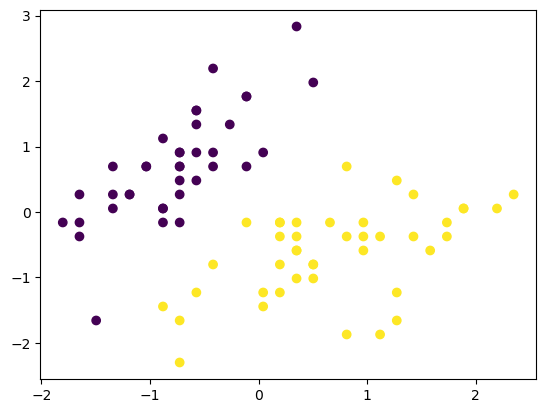

In [50]:
plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train)

In [1433]:
#%matplotlib inline
#Utiliser la commande ci-dessus si votre sortie graphique n'affiche rien


### Faire varier le critère de régularisation C

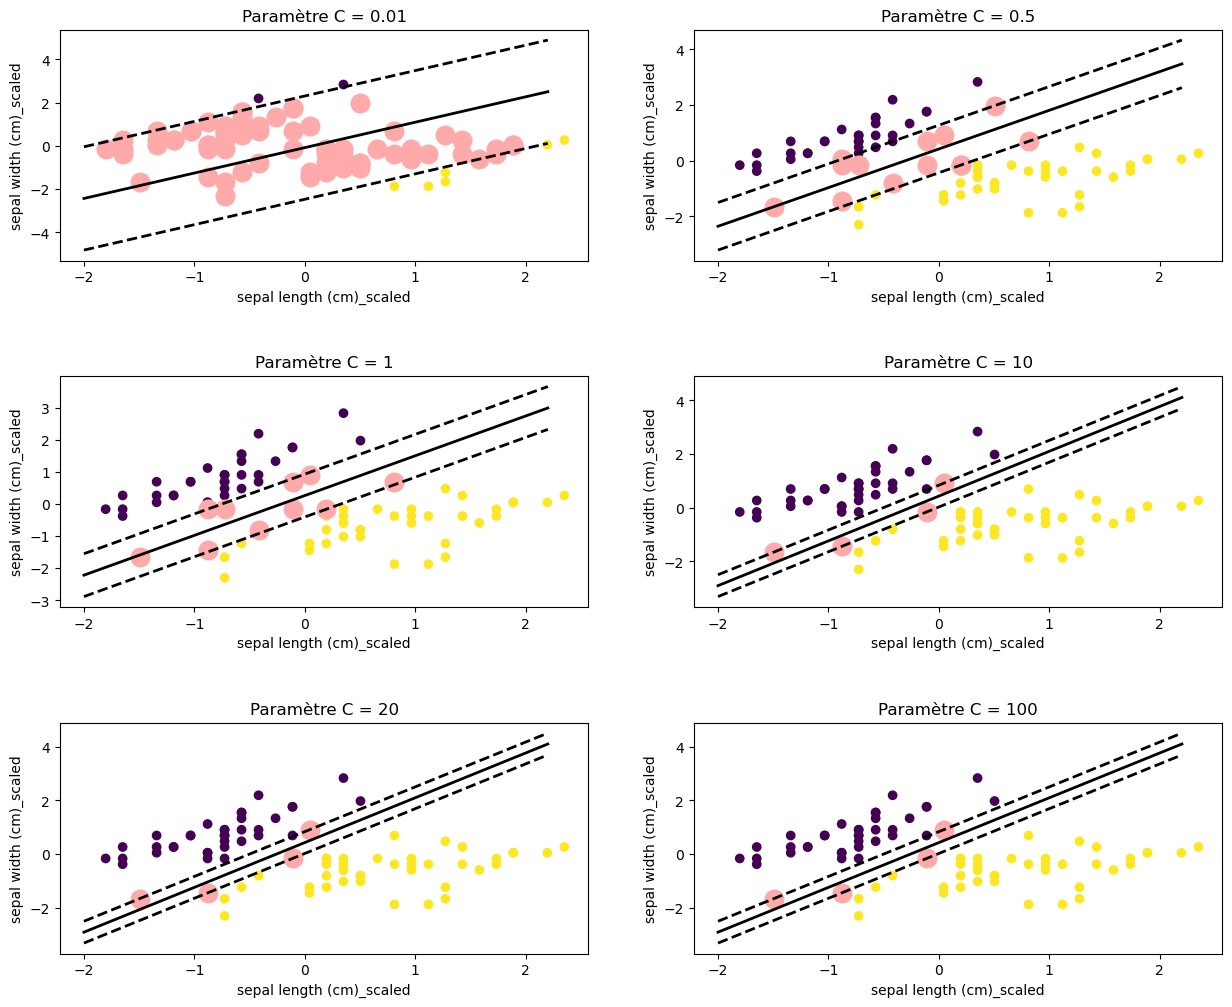

In [53]:
#Paramètre régularisation
C = [0.01,0.5,1,10,20,100]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,0:2], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,0], 
               X_train_sc[:,1], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col[0]+'_scaled')
    plt.ylabel(list_two_col[1]+'_scaled')

##### Commenter l'effet de C

Nous observons que plus on augmente la valeur de C plus on obtient des marges proches de la fronitère de décision.

Une faible valeur de C autorise un nombre de 'violations' importante à l'intérieur des marges
Une forte valeur de C diminue le nombre de violations' à l'intérieur des marges

#### Changer de paire de feature

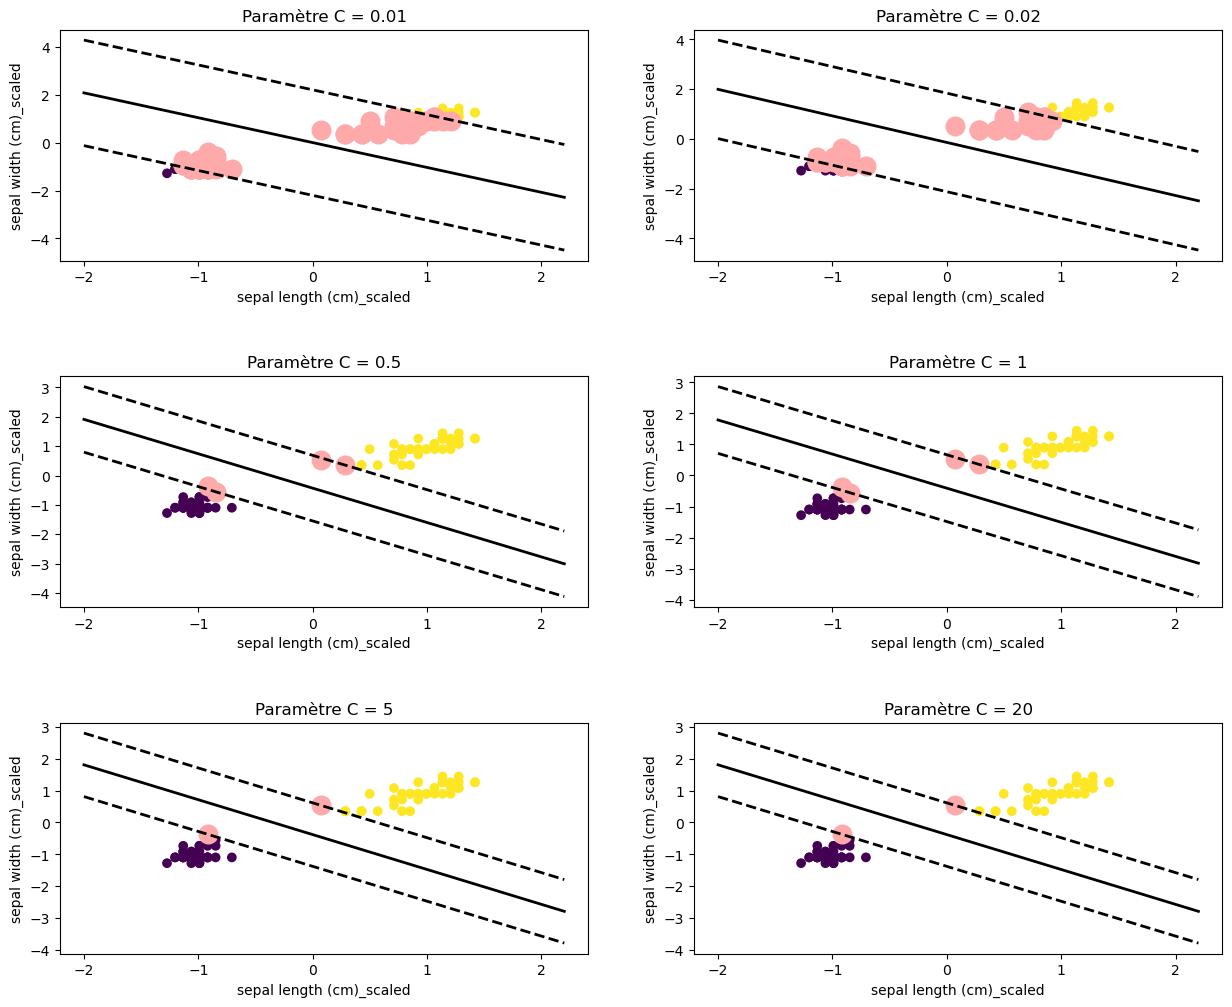

In [68]:
#Nouveaux features 

list_two_col_new = iris2.columns[0:4]


#Paramètre régularisation
C = [0.01,0.02,0.5,1,5,20]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,2:4], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,2], 
               X_train_sc[:,3], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col_new[0]+'_scaled')
    plt.ylabel(list_two_col_new[1]+'_scaled')

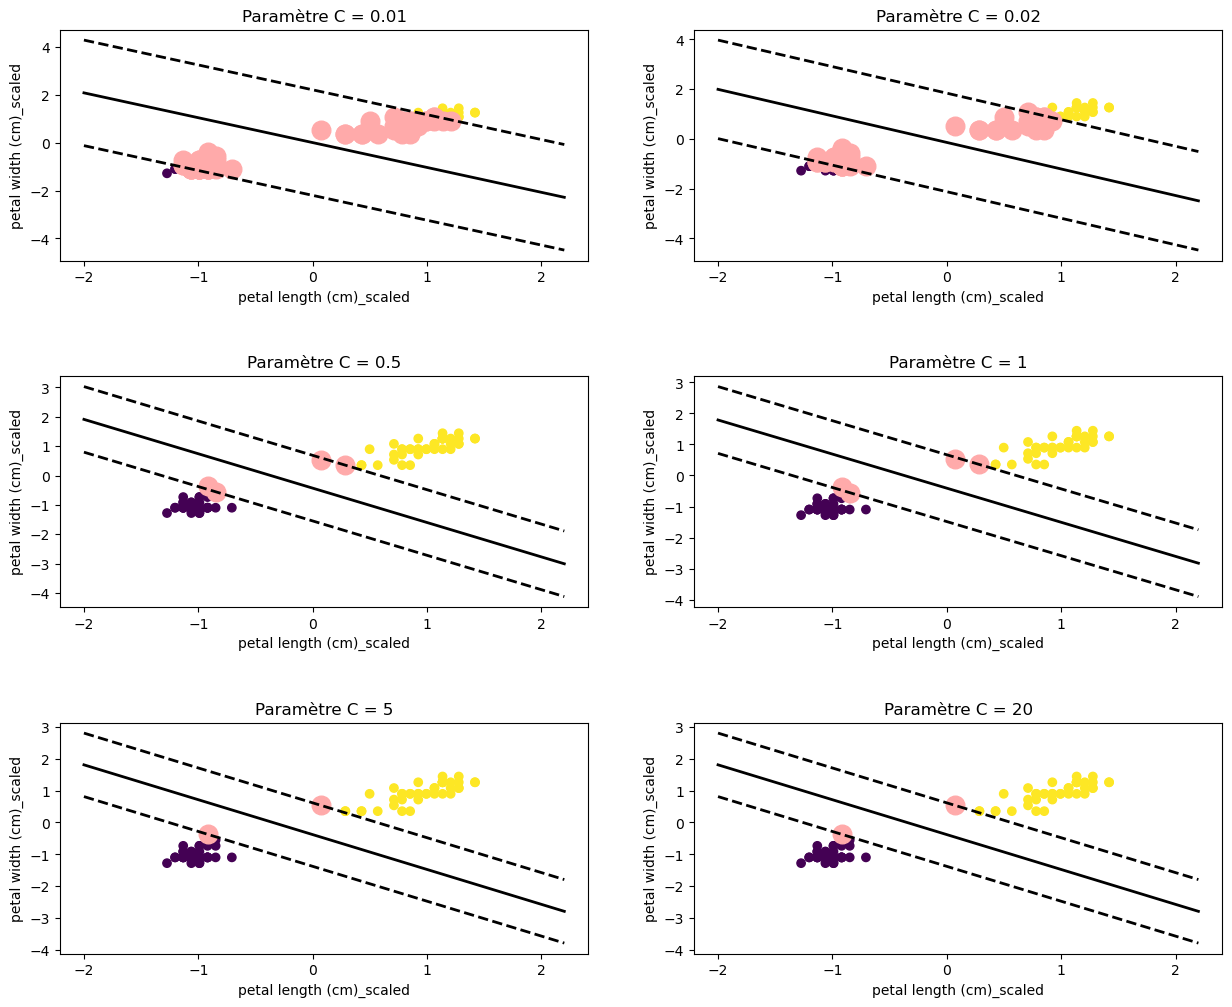

In [69]:
#Nouveaux features

list_two_col_new = iris2.columns[2:4]


#Paramètre régularisation
C = [0.01,0.02,0.5,1,5,20]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc[:,2:4], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_sc[:,2], 
               X_train_sc[:,3], 
                c=y_train
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel(list_two_col_new[0]+'_scaled')
    plt.ylabel(list_two_col_new[1]+'_scaled')

commentaire : 

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [71]:
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/01_SVM/td/data/iris_noise.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

iris_noise = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')
iris_noise['species'] = iris_noise['species'].astype('int32')

#Colnames
features_names = iris_noise.columns[0:4]

In [72]:
#On retire une espèce cette fois la 0
bin_iris_noise = iris_noise[iris_noise.species!=0]

In [73]:
#Train and Split
X_train, X_test, y_train , y_test  = train_test_split(bin_iris_noise[features_names], 
                                                      bin_iris_noise['species'], 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      random_state=42
                )

In [74]:
#Scaling features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

##### Modélisation binaire, 2 target

- LogisticRegression

In [90]:
#Regression logistique
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

- Linear SVM

In [91]:
linear_svc = LinearSVC(random_state=42, max_iter=2000)
linear_svc.fit(X_train_sc, y_train)

LinearSVC(max_iter=2000, random_state=42)

- SVM avec Klerner

In [92]:
# SVC
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)

SVC(kernel='linear', random_state=42)

- SGDClassifier

In [93]:
# SGDClassifier
sgd = SGDClassifier(loss='hinge' ,random_state=42)
sgd.fit(X_train_sc, y_train)

SGDClassifier(random_state=42)

- cross_val_score pour chaque fonction 

In [105]:
cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_lgr

array([0.91304348, 0.86956522, 0.77272727, 0.90909091, 0.63636364])

In [106]:
cvs_linear_svc = cross_val_score(linear_svc, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_linear_svc

array([0.86956522, 0.82608696, 0.72727273, 0.86363636, 0.59090909])

In [107]:
cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_svc

array([0.91304348, 0.82608696, 0.77272727, 0.90909091, 0.77272727])

In [108]:
cvs_sgd = cross_val_score(sgd, X_train_sc, y_train, cv=5, scoring='accuracy')
cvs_sgd

array([0.60869565, 0.7826087 , 0.63636364, 0.72727273, 0.68181818])

In [112]:
#data frame avec l'ensemble des résultats
cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_linear_svc,cvs_sgd,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
cross['model'] = ['lgr','lsvc','sgdc','svc']

In [121]:
cross

,fold1,fold2,fold3,fold4,fold5,model
0,0.913043,0.869565,0.772727,0.909091,0.636364,lgr
1,0.869565,0.826087,0.727273,0.863636,0.590909,lsvc
2,0.608696,0.782609,0.636364,0.727273,0.681818,sgdc
3,0.913043,0.826087,0.772727,0.909091,0.772727,svc


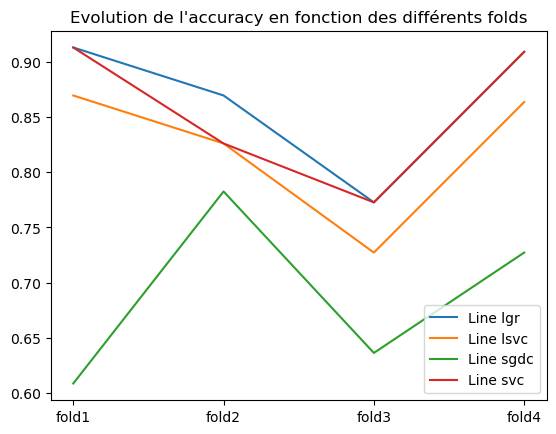

In [118]:
#Visualisation graphiques

for row in range(cross.shape[0]):
    plt.plot( cross.iloc[row,0:4] ,label='Line '+str(cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des différents folds")
plt.show()

In [123]:
for i in range(4):

    mean_model = cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.8201581027667985 et un std : 0.11726880394582447
Le modèle N° 1 a une accuray de 0.775494071146245 et un std : 0.11787174944193525
Le modèle N° 2 a une accuray de 0.6873517786561264 et un std : 0.06979391082972648
Le modèle N° 3 a une accuray de 0.8387351778656127 et un std : 0.06954444084279071


#### Choix du modèle, justification



On prend le modèle SVC comme modèle final. Il est celui qui a le meilleur score en moyenne sur les folds 84%. A l'inverse le modèle SGDClassifier offre des performances beaucoup plus faibles 69% de bonnes prédictions. Il s'agit d'un modèle qui offre beaucoup plus d'hyperparamètres, il nécessite beaucoup de tunage avant d'offrir des bonnes performances.

De plus le modèle SVC est celui qui a le moins de variance entre les scores de ses folds 0.07 de std. Le modèle semble stable et donc il possède moins de chance d'être en under ou overfitting.

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [124]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [125]:
params = {
    "kernel" : ["linear",'poly'],
    "C" : [0.5, 1, 10, 50,100,1000]
        }

c_svc = SVC(random_state=42)

In [127]:
grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)
take_grid = grid_c_svc.fit(X_train_sc, y_train)
take_grid.cv_results_


{'mean_fit_time': array([0.00192733, 0.00151515, 0.00162902, 0.00193725, 0.0025373 ,
        0.00184155, 0.005513  , 0.00235124, 0.01100669, 0.00320635,
        0.10237803, 0.00869875]),
 'std_fit_time': array([0.00041628, 0.00011287, 0.00024714, 0.00028126, 0.00041973,
        0.00020236, 0.00186317, 0.00024922, 0.00723515, 0.00101366,
        0.07763044, 0.00488809]),
 'mean_score_time': array([0.00096169, 0.00076408, 0.00078421, 0.00100384, 0.00091376,
        0.00080519, 0.00101471, 0.00081778, 0.00090604, 0.00077958,
        0.00092835, 0.00093298]),
 'std_score_time': array([1.56004154e-04, 1.55943977e-05, 5.64675467e-05, 1.35247495e-04,
        1.80244862e-04, 7.35318459e-05, 2.34367331e-04, 1.34419710e-04,
        5.19587114e-05, 7.34284945e-05, 3.45874285e-05, 1.14142645e-04]),
 'param_C': masked_array(data=[0.5, 0.5, 1, 1, 10, 10, 50, 50, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,

In [128]:
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleur combinaison d'estimateur est: {'C': 0.5, 'kernel': 'linear'}
pour un score de: 0.8387351778656127


<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Mean score'>

<Figure size 600x400 with 0 Axes>

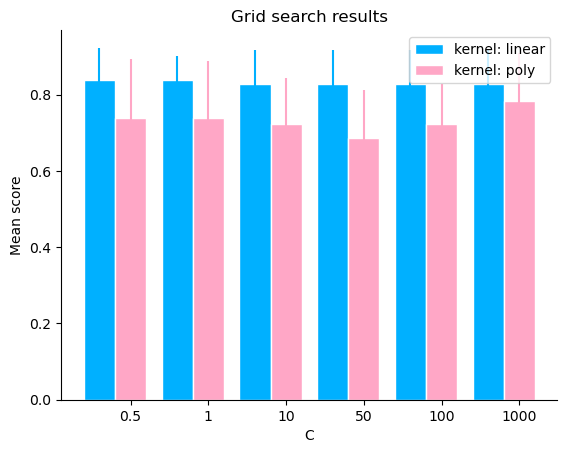

In [129]:
#!pip install sklearn_evaluation
plt.figure(figsize=(6,4))
plot.grid_search(take_grid.cv_results_, change='C', kind='bar')

##### Learning curve

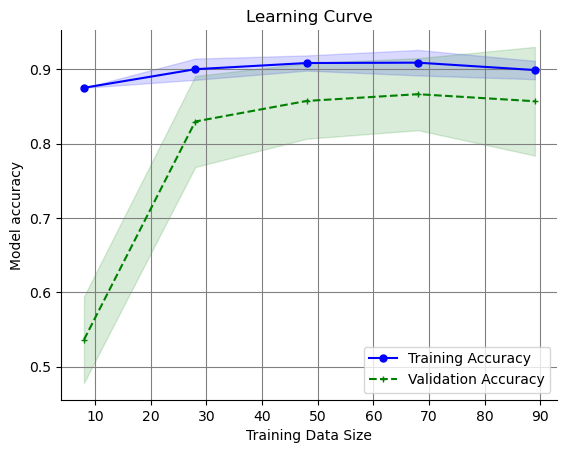

In [130]:
train_sizes, train_scores, test_scores = learning_curve(estimator=c_svc, 
                                                        X=X_train_sc, 
                                                        y=y_train,
                                                        cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        random_state=42
                                                       )

#
# Trop de fluctuation dans le modèle, on calcule la moyenne des métriques
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [131]:
take_grid.best_params_


{'C': 0.5, 'kernel': 'linear'}

In [132]:
best_svc = SVC(C=0.5, kernel='linear')
best_svc.fit(X_train_sc, y_train)

SVC(C=0.5, kernel='linear')

<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 300x200 with 0 Axes>

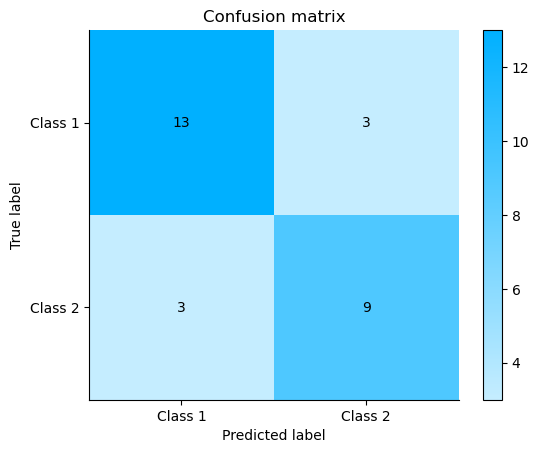

In [133]:
plt.figure(figsize=(3,2))
plot.confusion_matrix(best_svc.predict(X_test_sc), y_test)

##### Commenter la qualité de prédiction



On obtient donc une accuracy de 79% sur le dataset test. Les FP et FN sont équilibrés 3 erreurs de chaque.

Avec des modèles simplistes comme le SVC il sera difficile de réaliser une meilleure prédiction.

Le dataset iris_noise est volontairement bruité pour ne pas vous offrir des prédictions parfaites.

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [134]:
print('Training score: ' + str(best_svc.score(X_train_sc,y_train)), 
      '\n',
      'Test score: ' + str(best_svc.score(X_test_sc, y_test))
     )

Training score: 0.875 
 Test score: 0.7857142857142857


#### Performance in et out sample

Avec un training score de 87% et un test score de 78%, on pourrait suspecter un overfitting de notre modèle. Mais ici avec le dataset que nous utilisons il sera difficile de faire mieux.

Dans la réalité vous devriez soit :

Ajouter des données
Retuner votre modèle
Régulariser votre modèle
Changer de modèle

#### Influence de vos features sur le modèle

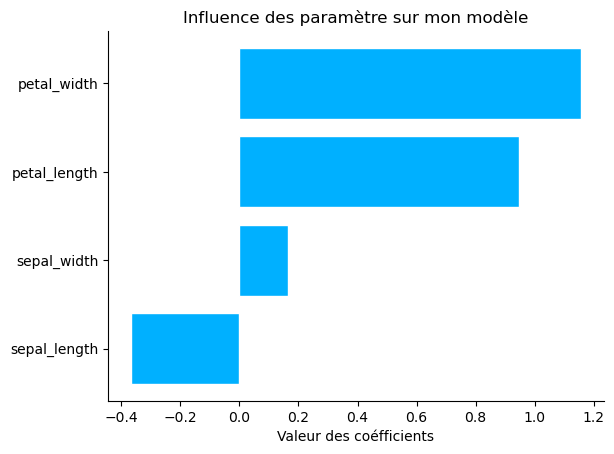

In [136]:
plt.title('Influence des paramètre sur mon modèle')
plt.xlabel('Valeur des coéfficients')
svm_f_importances(best_svc.coef_[0], features_names)

In [137]:
# Quelle est la valeur de référence 
svc.classes_[1]

2

## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [138]:
from sklearn import datasets
import pandas as pd
import numpy as np

sk_iris = datasets.load_iris()

iris = pd.DataFrame(
    data=np.c_[sk_iris.data, sk_iris.target], 
    columns=sk_iris['feature_names'] + ['species']
)

print(iris.info())

print(iris.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2

#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.10000

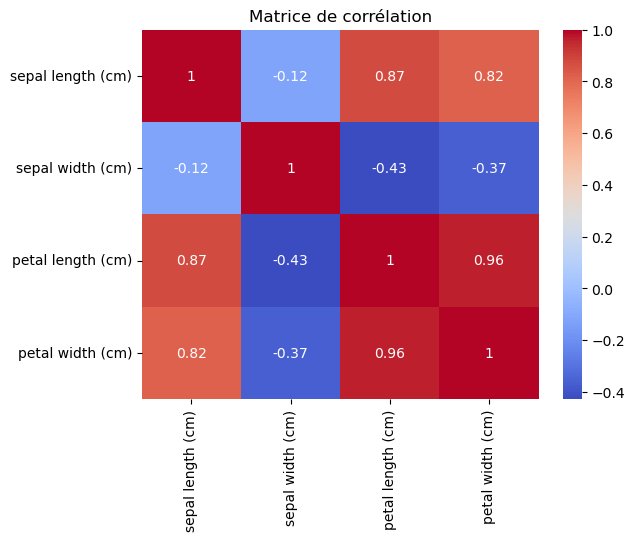

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sk_iris = datasets.load_iris()
iris = pd.DataFrame(
    data=np.c_[sk_iris.data, sk_iris.target], 
    columns=sk_iris['feature_names'] + ['species']
)

# 1. Analyse exploratoire des données
print(iris.info())
print(iris.describe())
print(iris.isnull().sum())  
print(iris['species'].value_counts()) 

# Visualisation de la corrélation
import seaborn as sns
sns.heatmap(iris.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# 2. Préparation des données
X = iris.iloc[:, :-1].values  # Caractéristiques
y = iris['species'].values  # Cible

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standarisation les données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [140]:
# 3. Modèles SVM : OVO et OVR
# SVM avec kernel linéaire
base_svm = SVC(kernel='linear', random_state=42)

# One-vs-One
ovo_clf = OneVsOneClassifier(base_svm)
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)

# One-vs-Rest
ovr_clf = OneVsRestClassifier(base_svm)
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)

# 4. Évaluation des modèles
# OVO
print("=== Classification Report OVO ===")
print(classification_report(y_test, y_pred_ovo, target_names=sk_iris.target_names))
print("Confusion Matrix OVO:")
print(confusion_matrix(y_test, y_pred_ovo))
print(f"Accuracy OVO: {accuracy_score(y_test, y_pred_ovo):.2f}")

# OVR
print("\n=== Classification Report OVR ===")
print(classification_report(y_test, y_pred_ovr, target_names=sk_iris.target_names))
print("Confusion Matrix OVR:")
print(confusion_matrix(y_test, y_pred_ovr))
print(f"Accuracy OVR: {accuracy_score(y_test, y_pred_ovr):.2f}")



=== Classification Report OVO ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix OVO:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Accuracy OVO: 0.91

=== Classification Report OVR ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      0.73      0.76        15
   virginica       0.75      0.80      0.77        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

Confusion Matrix OVR:
[[15  0  0]
 [ 0 11  4]
 [ 0  3 12]]
Accuracy OVR: 0.84


3) Existe-t-il des différences entre OVO et OVR?

La méthode OVO atteint de meilleures performances pcq'elle compare chaque paire de classes séparément, ce qui permet de gérer efficacement les chevauchements entre classes. En revanche, OVR, qui sépare une classe contre toutes les autres, peut être moins précis lorsque certaines classes partagent des frontières proches ou chevauchantes.

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>